In [1]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">Hide Script</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("Display Script");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("Hide Script");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import platform
os = platform.system()

stata_edition = "be" # please change according to your stata edition.
import stata_setup

if os == "Darwin":
    # Mac
    stata_setup.config("/Applications/stata", stata_edition)
elif os == "Windows":
    # Windows
    stata_setup.config("C://Program Files//Stata17", stata_edition)
    import markdown
    md = markdown.Markdown(extensions=['pymdownx.tabbed'])
else:
    print("Please set stata_setup.config() for your OS.")
    
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.precision = 4
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#  5  Robustness <a class="tocSkip">  



## 5.1 Load data

In [2]:
%%stata  
qui{
use ../data/suicide_analysis_data_static, clear

xtset citycode covid      
    
/* Local macro */
local absvars="citycode covid"
local clsvars="citycode"
local absvars_ind "i.citycode i.covid"    
local gmm2="gmm2s"
local log_="log_"
sum suicide
local suicide_t_m=r(mean)
sum suicide_m
local suicide_m_m=r(mean)
sum suicide_f
local suicide_f_m=r(mean)
sum `log_'active_opening_ratio
local log_active_opening_ratio_m=r(mean)
sum `log_'unemployment_rate
local log_unemployment_rate_m=r(mean)
sum `log_'patient
local log_patient_m=r(mean)
sum log_active_opening_weighted
local log_active_opening_weighted_m=r(mean)
sum log_bankruptcy_debt
local log_bankruptcy_debt_m=r(mean)

* For Tables
local txt_u20="Under 20"
local txt_20_40="20-39"
local txt_40_60="40-59"
local txt_o60="60 or over"    

/* Transformation of log(1+var) */
#delimit ;    

local paracomp_f_mobility_full="(mobility_index: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m'))
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) ";
local paracomp_f_cv_full="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m')) 
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) ";
local paracomp_f_1st_full="(commuter_ratio_m: _b[commuter_ratio_m]) 
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))) ";    
local paracomp_f_reduced_full="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m')) 
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_f_m')/(`suicide_f_m'))) ";

local paracomp_m_mobility_full="(mobility_index: _b[D.mobility_index]*(1+`suicide_m_m')/(`suicide_m_m')) 
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) ";
local paracomp_m_cv_full="(cv_residents: _b[D.cv_residents]*(1+`suicide_m_m')/(`suicide_m_m')) 
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) ";
local paracomp_m_1st_full="(commuter_ratio_f: _b[commuter_ratio_f])
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m')))
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))) ";
local paracomp_m_reduced_full="(commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_m_m')/(`suicide_m_m'))     
    (`log_'active_opening_ratio: _b[D.`log_'active_opening_ratio]*((`log_active_opening_ratio_m')/(1+`log_active_opening_ratio_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) 
    (`log_'patient: _b[D.`log_'patient]*((`log_patient_m')/(1+`log_patient_m'))*((1+`suicide_m_m')/(`suicide_m_m'))) ";

};



. qui{

. 


##  5.a Alternative Instruments <a class="tocSkip">

### 1. All Commuter Ratio

In [3]:
%%stata
qui{
foreach x in u20{
sum suicide_f_`x'
local suicide_f_m=r(mean)
    
* Define label temporary    
label variable mobility_index "Mobility index"
label variable cv_residents "Mobility index"    

#delimit ;
local paracomp_f_mobility_full="(mobility_index: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_cv_full="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m'))";
local paracomp_f_1st_all_full="(commuter_ratio: _b[commuter_ratio])";  
local paracomp_f_cv_1st_all_full="(commuter_ratio: _b[commuter_ratio]) ";    
local paracomp_f_reduced_all_full="(commuter_ratio: _b[commuter_ratio]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_cv_reduced_all_full="(commuter_ratio: _b[commuter_ratio]*(1+`suicide_f_m')/(`suicide_f_m')) ";

#delimit cr
/* Outflow ratio */
    
* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.mobility_index=commuter_ratio ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'

** Save 2nd stage result
nlcom `paracomp_f_mobility_full', post
est store suicide_f_`x'_2nd

** Save 1st stage result
est restore F_1st_D_mobility_index
nlcom `paracomp_f_1st_all_full', post
est store suicide_f_`x'_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'
estadd scalar F = `e(widstat)' : suicide_f_`x'_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_1st
                                                                                                                         
** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio, cluster(`clsvars')
nlcom `paracomp_f_reduced_all_full', post
est store suicide_f_`x'_reduced
    
/* CV */
* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.cv_residents=commuter_ratio ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'_cv

** Save 2nd stage result
nlcom `paracomp_f_cv_full', post
est store suicide_f_`x'_cv_2nd

** Save 1st stage result
est restore F_1st_D_cv_residents
nlcom `paracomp_f_cv_1st_all_full', post
est store suicide_f_`x'_cv_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'_cv
estadd scalar F = `e(widstat)' : suicide_f_`x'_cv_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_cv_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_cv_1st

** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio, cluster(`clsvars')
nlcom `paracomp_f_cv_reduced_all_full', post
est store suicide_f_`x'_cv_reduced

#delimit ;
noi: di "******* female `x' *******";
noi: esttab suicide_f_`x'_1st suicide_f_`x'_2nd suicide_f_`x'_reduced suicide_f_`x'_cv_1st suicide_f_`x'_cv_2nd suicide_f_`x'_cv_reduced, 
keep(mobility_index commuter_ratio) order(mobility_index commuter_ratio) b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label
mtitles("1st Stage" "IV" "Reduced form" "1st Stage" "IV" "Reduced form") mgroups("Outflow ratio" "CV", pattern(1 0 0  1 0 0 )) rename(cv_residents mobility_index)
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation"))  varwidth(5) modelwidth(5);                   

noi: di "******* female `x' *******";
noi: esttab suicide_f_`x'_1st suicide_f_`x'_2nd suicide_f_`x'_reduced suicide_f_`x'_cv_1st suicide_f_`x'_cv_2nd suicide_f_`x'_cv_reduced using "../figuretable/robustness/baseline_cv_outflowratio_all_fullresult_female_`x'.tex", 
keep(mobility_index commuter_ratio) order(mobility_index commuter_ratio) b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label
mtitles("1st Stage" "IV" "Reduced form" "1st Stage" "IV" "Reduced form") mgroups("Outflow ratio" "CV", pattern(1 0 0  1 0 0 ) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span}))
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) rename(cv_residents mobility_index) replace
booktabs alignment(D{.}{.}{-1});                                                                                                                                   
 
                                                                                                                                   
* Redefine label                                                                                 
label variable mobility_index "Outflow ratio";
label variable cv_residents "CV";
                                                                                                                                   
};
};


. qui{
******* female u20 *******

-----------------------------------------------------------
      Out~o                         CV                     
        (1)      (2)      (3)      (4)      (5)      (6)   
      1st~e       IV    Red~m    1st~e       IV    Red~m   
-----------------------------------------------------------
Mob~x          -5.115**                    -0.576**          
               (2.216)                      (0.249)            

Com~o -0.138***          0.704**  -1.223***          0.704** 
      (0.005)             (0.305)    (0.042)             (0.305)   
-----------------------------------------------------------
F s~c 747.935                      844.054                     
Eff~c 747.935                      844.054                     
tau~% 23.109                      23.109                     
Obs~n  1891     1891     1891     1891     1891     1891   
-----------------------------------------------------------
Standard errors in parentheses
* p<0.

### 2. Both Separate Commuter Ratio

In [4]:
%%stata
qui{
foreach x in u20{
sum suicide_f_`x'
local suicide_f_m=r(mean)
    
* Define label temporary    
label variable mobility_index "Mobility index"
label variable cv_residents "Mobility index"   

#delimit ;
local paracomp_f_mobility_full="(mobility_index: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_cv_full="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m'))";
local paracomp_f_1st_both_full="(commuter_ratio_m: _b[commuter_ratio_m]) 
    (commuter_ratio_f: _b[commuter_ratio_f]) "; 
local paracomp_f_cv_1st_both_full="(commuter_ratio_m: _b[commuter_ratio_m]) 
    (commuter_ratio_f: _b[commuter_ratio_f]) "; 
local paracomp_f_reduced_both_full="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m')) 
    (commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_cv_reduced_both_full="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m')) 
    (commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_f_m')/(`suicide_f_m')) ";


#delimit cr
/* Outflow ratio */
    
* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.mobility_index = commuter_ratio_m commuter_ratio_f), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'

** Save 2nd stage result
nlcom `paracomp_f_mobility_full', post
est store suicide_f_`x'_2nd

** Save 1st stage result
est restore F_1st_D_mobility_index
nlcom `paracomp_f_1st_both_full', post
est store suicide_f_`x'_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'
estadd scalar F = `e(widstat)' : suicide_f_`x'_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_1st
                                                                                                                         
** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio_m commuter_ratio_f, cluster(`clsvars')
nlcom `paracomp_f_reduced_both_full', post
est store suicide_f_`x'_reduced
    
/* CV */
* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.cv_residents = commuter_ratio_m commuter_ratio_f ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'_cv

** Save 2nd stage result
nlcom `paracomp_f_cv_full', post
est store suicide_f_`x'_cv_2nd

** Save 1st stage result
est restore F_1st_D_cv_residents
nlcom `paracomp_f_cv_1st_both_full', post
est store suicide_f_`x'_cv_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'_cv
estadd scalar F = `e(widstat)' : suicide_f_`x'_cv_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_cv_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_cv_1st

** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio_m commuter_ratio_f, cluster(`clsvars')
nlcom `paracomp_f_cv_reduced_both_full', post
est store suicide_f_`x'_cv_reduced

#delimit ;
noi: di "******* female `x' *******";
noi: esttab suicide_f_`x'_1st suicide_f_`x'_2nd suicide_f_`x'_reduced suicide_f_`x'_cv_1st suicide_f_`x'_cv_2nd suicide_f_`x'_cv_reduced, 
keep(mobility_index commuter_ratio_m commuter_ratio_f) order(mobility_index commuter_ratio_m commuter_ratio_f) b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label
mtitles("1st Stage" "IV" "Reduced form" "1st Stage" "IV" "Reduced form") mgroups("Outflow ratio" "CV", pattern(1 0 0  1 0 0 )) rename(cv_residents mobility_index)
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation"))  varwidth(5) modelwidth(5);                   

noi: di "******* female `x' *******";
noi: esttab suicide_f_`x'_1st suicide_f_`x'_2nd suicide_f_`x'_reduced suicide_f_`x'_cv_1st suicide_f_`x'_cv_2nd suicide_f_`x'_cv_reduced using "../figuretable/robustness/baseline_cv_outflowratio_both_separate_fullresult_female_`x'.tex", 
keep(mobility_index commuter_ratio_m commuter_ratio_f) order(mobility_index commuter_ratio_m commuter_ratio_f) b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label
mtitles("1st Stage" "IV" "Reduced form" "1st Stage" "IV" "Reduced form") mgroups("Outflow ratio" "CV", pattern(1 0 0  1 0 0 ) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span}))
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) rename(cv_residents mobility_index) replace
booktabs alignment(D{.}{.}{-1});                                                                                                                                   
    
};
                                                                                                            
* Redefine label                                                                                 
label variable mobility_index "Outflow ratio";
label variable cv_residents "CV";                                                                                                            
                                                                                                            
};


. qui{
******* female u20 *******

-----------------------------------------------------------
      Out~o                         CV                     
        (1)      (2)      (3)      (4)      (5)      (6)   
      1st~e       IV    Red~m    1st~e       IV    Red~m   
-----------------------------------------------------------
Mob~x          -6.007***                   -0.669***         
               (2.150)                      (0.243)            

Mal~o -0.232***          2.846*** -1.937***          2.846***
      (0.023)             (1.045)    (0.184)             (1.045)   

Fem~o 0.112***          -2.425**  0.859***          -2.425** 
      (0.025)             (1.131)    (0.201)             (1.131)   
-----------------------------------------------------------
F s~c 397.703                      447.890                     
Eff~c 312.850                      365.618                     
tau~% 9.483                      8.591                     
Obs~n  1891     1891     189

##  5.b Alternative Mobility Measure <a class="tocSkip">

In [5]:
%%stata
* Define label temporary    
label variable cv_residents_spot "CV (Within cities)"


. * Define label temporary    
. label variable cv_residents_spot "CV (Within cities)"

. 


### 1. Cross Gender IV

In [6]:
%%stata
qui{  
foreach x in u20{    
sum suicide_f_`x'
local suicide_f_m=r(mean)

#delimit ;
local paracomp_f_cv_spot_full="(cv_residents_spot: _b[D.cv_residents_spot]*(1+`suicide_f_m')/(`suicide_f_m'))";
local paracomp_f_1st_full="(commuter_ratio_m: _b[commuter_ratio_m]) ";    
local paracomp_f_reduced_full="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m')) ";
    
#delimit cr
* Female
*FE
reghdfe D.suicide_f_`x'_log D.cv_residents_spot, cluster(`clsvars')
nlcom `paracomp_f_cv_spot_full', post
est store suicide_f_`x'_FE

* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.cv_residents_spot=commuter_ratio_m ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'_cv_spot

** Save 2nd stage result
nlcom `paracomp_f_cv_spot_full', post
est store suicide_f_`x'_cv_spot_2nd

** Save 1st stage result
est restore F_1st_D_cv_residents_spot
nlcom `paracomp_f_1st_full', post
est store suicide_f_`x'_cv_spot_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'_cv_spot
estadd scalar F = `e(widstat)' : suicide_f_`x'_cv_spot_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_cv_spot_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_cv_spot_1st
** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio_m, cluster(`clsvars')
nlcom `paracomp_f_reduced_full', post
est store suicide_f_cv_p_`x'_reduced

#delimit ;
noi: esttab  suicide_f_`x'_FE suicide_f_`x'_cv_spot_1st suicide_f_`x'_cv_spot_2nd suicide_f_cv_p_`x'_reduced, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1)) mlabels("Log(Female suicide)" "CV (Within cities)" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: "))  
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) varwidth(10) modelwidth(10);
                                                                                            
noi: esttab  suicide_f_`x'_FE suicide_f_`x'_cv_spot_1st suicide_f_`x'_cv_spot_2nd suicide_f_cv_p_`x'_reduced using "../figuretable/robustness/baseline_cv_spot_crossgender_fullresult_female_`x'.tex", 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label replace 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span}))
mlabels("Log(Female suicide)" "CV (Within cities)" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) 
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) 
booktabs alignment(D{.}{.}{-1});                                                                                              

}; 
};                                                                       


. qui{  

------------------------------------------------------------------
                  OLS     1st Stage            IV    Reduced ~m   
                  (1)           (2)           (3)           (4)   
Dependen~: Log(Fema~)    CV (With~)    Log(Fema~)    Log(Fema~)   
------------------------------------------------------------------
CV (With~)     -0.224**                    -0.683**               
              (0.095)                     (0.316)                 

Male com~o                   -1.256***                    0.741** 
                            (0.081)                     (0.292)   
------------------------------------------------------------------
F statis~c                  238.812                               
Effectiv~c                  238.812                               
tau=10\%                     23.109                               
Observat~n       1446          1446          1446          1891   
--------------------------------------------------

### 2. Both Separate Gender IV

In [7]:
%%stata
qui{  
foreach x in u20{    
sum suicide_f_`x'
local suicide_f_m=r(mean)

#delimit ;
local paracomp_f_cv_spot_full="(cv_residents_spot: _b[D.cv_residents_spot]*(1+`suicide_f_m')/(`suicide_f_m')) ";
local paracomp_f_1st_both_full="(commuter_ratio_m: _b[commuter_ratio_m]) 
    (commuter_ratio_f: _b[commuter_ratio_f])  ";    
local paracomp_f_reduced_both_full="(commuter_ratio_m: _b[commuter_ratio_m]*(1+`suicide_f_m')/(`suicide_f_m')) 
    (commuter_ratio_f: _b[commuter_ratio_f]*(1+`suicide_f_m')/(`suicide_f_m'))";
    
#delimit cr
* Female
*FE
reghdfe D.suicide_f_`x'_log D.cv_residents_spot, cluster(`clsvars')
nlcom `paracomp_f_cv_spot_full', post
est store suicide_f_`x'_FE

* IV (1st & 2nd Stage)
ivreg2 D.suicide_f_`x'_log (D.cv_residents_spot=commuter_ratio_m commuter_ratio_f ), gmm2s cluster(`clsvars') first savefirst savefprefix(F_1st_)
est store tmp_suicide_f_`x'_cv_spot

** Save 2nd stage result
nlcom `paracomp_f_cv_spot_full', post
est store suicide_f_`x'_cv_spot_2nd

** Save 1st stage result'_cv_spot_2nd
est restore F_1st_D_cv_residents_spot
nlcom `paracomp_f_1st_both_full', post
est store suicide_f_`x'_cv_spot_1st

** Add 1st stage statistics
est restore tmp_suicide_f_`x'_cv_spot
estadd scalar F = `e(widstat)' : suicide_f_`x'_cv_spot_1st
weakivtest
estadd scalar F_eff=r(F_eff) : suicide_f_`x'_cv_spot_1st
estadd scalar c_TSLS_10=r(c_TSLS_10) : suicide_f_`x'_cv_spot_1st
** Reduced form
reghdfe D.suicide_f_`x'_log commuter_ratio_m commuter_ratio_f, cluster(`clsvars')
nlcom `paracomp_f_reduced_both_full', post
est store suicide_f_cv_p_`x'_reduced

#delimit ;
noi: esttab  suicide_f_`x'_FE suicide_f_`x'_cv_spot_1st suicide_f_`x'_cv_spot_2nd suicide_f_cv_p_`x'_reduced, 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1)) mlabels("Log(Female suicide)" "CV (Within cities)" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) 
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) varwidth(10) modelwidth(10);
                                                                                            
noi: esttab  suicide_f_`x'_FE suicide_f_`x'_cv_spot_1st suicide_f_`x'_cv_spot_2nd suicide_f_cv_p_`x'_reduced using "../figuretable/robustness/baseline_cv_spot_both_separate_fullresult_female_`x'.tex", 
b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label replace 
mgroups("OLS" "1st Stage" "IV" "Reduced form", pattern(1 1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span}))
mlabels("Log(Female suicide)" "CV (Within cities)" "Log(Female suicide)" "Log(Female suicide)", lhs("Dependent variables: ")) 
stats(F F_eff c_TSLS_10 N, layout(@ @ @ @) fmt(3 3 3 %5.0f) labels("F statistic" "Effective F statistic" "tau=10\%" "Observation")) 
booktabs alignment(D{.}{.}{-1});                                                                                              

}; 
};       


. qui{  

------------------------------------------------------------------
                  OLS     1st Stage            IV    Reduced ~m   
                  (1)           (2)           (3)           (4)   
Dependen~: Log(Fema~)    CV (With~)    Log(Fema~)    Log(Fema~)   
------------------------------------------------------------------
CV (With~)     -0.224**                    -0.742**               
              (0.095)                     (0.313)                 

Male com~o                   -1.977***                    2.846***
                            (0.328)                     (1.045)   

Female c~o                    0.822**                    -2.425** 
                            (0.373)                     (1.131)   
------------------------------------------------------------------
F statis~c                  128.150                               
Effectiv~c                  113.695                               
tau=10\%                      6.404              

# 5.c Alternative statistical model - Poisson-

In [8]:
%%stata
qui{
#delimit cr
qui: set linesize 132     
* Female cross iv
qui: xtreg mobility_index commuter_ratio_m_iv i.covid, fe     
est store suicide_f_poi_c_f_u20  
qui:capture drop  mobility_index_hat                                                                                                                
qui:predict double mobility_index_hat, e                                                                                                                 
xtpoisson suicide_f_u20 mobility_index mobility_index_hat i.covid, fe vce(robust) 
est store suicide_f_poi_c_u20  

* Female both separate iv
qui: xtreg mobility_index commuter_ratio_m_iv commuter_ratio_f_iv i.covid, fe     
est store suicide_f_poi_b_f_u20  
qui:capture drop  mobility_index_hat                                                                                                                
qui:predict double mobility_index_hat, e                                                                                                                 
xtpoisson suicide_f_u20 mobility_index mobility_index_hat i.covid, fe vce(robust) 
est store suicide_f_poi_b_u20  
    
* Female cross iv
qui: xtreg cv_residents commuter_ratio_m_iv  i.covid, fe     
est store suicide_f_poi_cv_c_f_u20  
qui:capture drop  cv_residents_hat                                                                                                                
qui:predict double cv_residents_hat, e                                                                                                                 
xtpoisson suicide_f_u20 cv_residents cv_residents_hat  i.covid, fe vce(robust) 
est store suicide_f_poi_cv_c_u20  

* Female both separate iv
qui: xtreg cv_residents commuter_ratio_m_iv commuter_ratio_f_iv  i.covid, fe     
est store suicide_f_poi_cv_b_f_u20  
qui:capture drop  cv_residents_hat                                                                                                                
qui:predict double cv_residents_hat, e                                                                                                                 
xtpoisson suicide_f_u20 cv_residents cv_residents_hat  i.covid, fe vce(robust) 
est store suicide_f_poi_cv_b_u20  
    
#delimit ;
noi: esttab suicide_f_poi_c_f_u20 suicide_f_poi_c_u20 suicide_f_poi_b_f_u20 suicide_f_poi_b_u20 suicide_f_poi_cv_c_f_u20 suicide_f_poi_cv_c_u20 suicide_f_poi_cv_b_f_u20 suicide_f_poi_cv_b_u20 , 
keep(mobility_index cv_residents  commuter_ratio_m_iv commuter_ratio_f_iv) order(mobility_index cv_residents  commuter_ratio_m_iv commuter_ratio_f_iv) eqlabels(" " " ") b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("1st Stage" "IV" "1st Stage" "IV" "1st Stage" "IV" "1st Stage" "IV", pattern(1 1 1 1 1 1 1 1 )) mlabels("Outflow ratio" "Log(Female suicide)" "Outflow ratio" "Log(Female suicide)" "CV" "Log(Female suicide)" "CV" "Log(Female suicide)", lhs("Dependent Variables: ")) 
stats(F N, layout(@ @) fmt(3 0 %5.0f) labels("F statistic" "Observation")) varwidth(10) modelwidth(10);      

noi: esttab suicide_f_poi_c_f_u20 suicide_f_poi_c_u20 suicide_f_poi_b_f_u20 suicide_f_poi_b_u20 suicide_f_poi_cv_c_f_u20 suicide_f_poi_cv_c_u20 suicide_f_poi_cv_b_f_u20 suicide_f_poi_cv_b_u20 using "../figuretable/robustness/poisson_cv_outflowratio_fullresult_female_u20.tex", replace 
keep(mobility_index cv_residents  commuter_ratio_m_iv commuter_ratio_f_iv) order(mobility_index cv_residents  commuter_ratio_m_iv commuter_ratio_f_iv) eqlabels(" " " ") b(%4.3f) se(%4.3f) star(* 0.10 ** 0.05  *** 0.01) label 
mgroups("1st Stage" "IV" "1st Stage" "IV" "1st Stage" "IV" "1st Stage" "IV", pattern(1 1 1 1 1 1 1 1 )  prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) mlabels("Outflow ratio" "Log(Female suicide)" "Outflow ratio" "Log(Female suicide)" "CV" "Log(Female suicide)" "CV" "Log(Female suicide)", lhs("Dependent Variables: ")) 
stats(F N, layout(@ @) fmt(3 0 %5.0f) labels("F statistic" "Observation"))
booktabs alignment(D{.}{.}{-1});
};


. qui{

--------------------------------------------------------------------------------------------------------------------------
            1st Stage            IV     1st Stage            IV     1st Stage            IV     1st Stage            IV   
                  (1)           (2)           (3)           (4)           (5)           (6)           (7)           (8)   
Dependen~: Outflow ~o    Log(Fema~)    Outflow ~o    Log(Fema~)            CV    Log(Fema~)            CV    Log(Fema~)   
--------------------------------------------------------------------------------------------------------------------------
                                                                                                                          
Mobility~x                   -6.198*                     -5.903*                                                          
                            (3.422)                     (3.321)                                                           

CV    

# Specification Curve

## make subdata

In [23]:
%%stata
qui{
local mb=0
    

foreach x of numlist 0/1{    
use ../data/suicide_analysis_data,clear    
if `x'==1{
 drop if ustrpos(usubstr(cityname,ustrlen(cityname),.),"町")|ustrpos(usubstr(cityname,ustrlen(cityname),.),"村")
}   
    
/* Merge coefficient of varietion data */
merge 1:1 citycode year month using ../data/station_place_cv_mb`mb'
drop if _merge==2    
drop _merge       
merge 1:1 citycode year month using ../data/place_cv_mb`mb'    
drop if _merge==2
drop _merge  
merge 1:1 citycode year month using ../data/station_cv_mb`mb'    
drop if _merge==2
drop _merge      
keep if year==2019|year==2020|year==2021
gen covid=0
replace covid=1 if (year==2020&month>=4)|year==2021
drop if (year==2019 & month<=3) | year==2021 & month>=4

/* mobility adjustment */
replace mobility=0 if mobility<0 & mobility~=.
             
if `x'==0{    
save temp0,replace
drop if (year==2019 & month==3)
save temp1,replace    
drop if year==2022
save temp2,replace    
use temp0,clear
drop if year==2022
save temp3,replace    
}
else{
save temp4,replace
drop if (year==2019 & month==3)
save temp5,replace    
drop if year==2022
save temp6,replace    
use temp0,clear
drop if year==2022
save temp7,replace            
}
}
}




. qui{

. 
. 


In [24]:
%%stata 
qui{
foreach t of numlist 0/7{
use temp`t',clear
    
collapse (sum) suicide* state_emergency_days state_emergency_1_days state_emergency_2_days school_closure_days (mean) stay_home mobility *_ratio* patient bankruptcy_debt unemployment_rate prefcode cv_* (first) prefecture cityname,by(citycode covid)
rename mobility mobility_index

/* Standardize CV data */
foreach v of varlist cv_residents cv_nonresidents cv_residents_spot cv_nonresidents_spot cv_residents_station cv_nonresidents_station cv_residents_place cv_nonresidents_place {
egen v = std(`v')  
drop `v'
rename v `v'   
}

/* Make log value */
gen suicide_log=log(1+suicide)
gen suicide_m_log=log(1+suicide_m)
gen suicide_f_log=log(1+suicide_f)

foreach x in u20 20_40 40_60 o60 2029 3039 4049 5059 6069 7079{
gen suicide_m_`x'_log=log(1+suicide_m_`x')
gen suicide_f_`x'_log=log(1+suicide_f_`x')
gen suicide_`x'_log=log(1+suicide_`x')
}    

foreach x in student single cohabit {
gen suicide_`x'_log=log(1+suicide_`x')
gen suicide_m_`x'_log=log(1+suicide_m_`x')
gen suicide_f_`x'_log=log(1+suicide_f_`x')
}
             
gen log_patient=log(1+patient)
gen log_active_opening_ratio=log(active_opening_ratio)

rename active_opening_ratio_weighted active_opening_weighted
gen log_active_opening_weighted=log(active_opening_weighted)
gen log_unemployment_rate=log(unemployment_rate)

gen log_bankruptcy_debt = log(1+bankruptcy_debt)

/* Make ratio of government orders */    
gen state_emergency_rate=state_emergency_days/365
gen state_emergency1_rate=state_emergency_1_days/365
gen state_emergency2_rate=state_emergency_2_days/365
gen school_closure_ratio=school_closure_days/365

/* Make IVs for Poisson Analysis */
gen commuter_ratio_iv=commuter_ratio*(1-covid)
gen commuter_ratio_f_iv=commuter_ratio_f*(1-covid)
gen commuter_ratio_m_iv=commuter_ratio_m*(1-covid)
gen commuter_ratio_student_iv=commuter_ratio_student*(1-covid)      
gen commuter_ratio_worker_iv=commuter_ratio_worker*(1-covid)  
gen cv_nonresidents_spot_iv=cv_nonresidents_spot*(1-covid)  

/* Label variables for table making */
label variable mobility_index "Outflow ratio"
label variable cv_residents "CV"
label variable cv_nonresidents "CV for non-residents"             
label variable cv_residents_place "CV (Within cities)"             
label variable commuter_ratio "Commuting ratio"
label variable commuter_ratio_m "Male commuting ratio"
label variable commuter_ratio_f "Female commuting ratio"
label variable commuter_ratio_iv "Commuting ratio"             
label variable commuter_ratio_m_iv "Male commuting ratio"
label variable commuter_ratio_f_iv "Female commuting ratio"
label variable log_active_opening_ratio "Log(Active job opening ratio)"
label variable log_patient "Log(Patient)"
label variable log_unemployment_rate "Log(Unemployment rate)"             
label variable log_bankruptcy_debt "Log(Bankruptcies)"
                    
save data`t'.dta,replace   
erase temp`t'.dta         
}             
} 


. qui{

. 


## Outflow Ratio

In [25]:
%%stata  
qui{
use ../data/suicide_analysis_data_static, clear
local x="u20"
sum suicide_f_`x'
local suicide_f_m=r(mean)    
est clear
local no=0    
local paracomp_f="(mobility_indx: _b[D.mobility_index]*(1+`suicide_f_m')/(`suicide_f_m')) "
foreach poi of numlist 0/1{   
if `poi'==0{   
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "D.log_active_opening_ratio" {
     foreach patient in "" "D.log_patient" {
      foreach sch_clo_rat in "" "D.school_closure_ratio" {
        foreach unemp_rat in "" "D.log_unemployment_rate" {     
          foreach bank_debt in "" "D.log_bankruptcy_debt" {                
          local ivs="commuter_ratio_m"   
         if `iv_var'==1 qui local ivs="commuter_ratio" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m commuter_ratio_f "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
        qui: xtset citycode covid                                      
        qui:ivreg2 D.suicide_f_`x'_log (D.mobility_index= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars')   
        qui:nlcom `paracomp_f', post    
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace 
        qui estadd scalar  poi_v = 0, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'   
        if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0)&(`iv_var'==0)&(`act_ope_rat_v'==0)&(`patient_v'==0)&(`unemp_rat_v'==0)&(`sch_clo_rat_v'==0) &(`bank_debt_v'==0)  {
        noi: di "`dataset'"    
        noi: di "ivreg2 D.suicide_f_`x'_log (D.mobility_index= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars') "                                                                                                                                                             
            noi: di  "base: `no'"                                                                                                                                                 
        }                                          
        local ++no   
        if `no'==1{                                  
         qui:estimate save models,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models,append
         qui:est clear            
        }   
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }
}
}
else{
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "log_active_opening_ratio" {
     foreach patient in "" "log_patient" {
      foreach sch_clo_rat in "" "school_closure_ratio" {
        foreach unemp_rat in "" "log_unemployment_rate" {     
          foreach bank_debt in "" "log_bankruptcy_debt" {   
         
          local ivs="commuter_ratio_m_iv"   
         if `iv_var'==1 qui local ivs="commuter_ratio_iv" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m_iv commuter_ratio_f_iv "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
                                         
        qui: xtset citycode covid    
        qui: xtreg mobility_index `ivs'	 `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe                             
        qui:capture drop  mobility_index_hat                                                                                                                
        qui:predict double mobility_index_hat, e                                                                                                                 
        qui:xtpoisson suicide_f_`x' mobility_index mobility_index_hat `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe vce(robust)               
        qui:nlcom (mobility_indx: _b[mobility_index]), post
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace  
        qui estadd scalar  poi_v = 1, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'                                             
        local ++no   
        if `no'==1{                                  
         qui:estimate save models,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models,append
         qui:est clear            
        }                                 
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }        
}
}
}
}              
di `no'






. qui{
use data0,clear
ivreg2 D.suicide_f_u20_log (D.mobility_index= commuter_ratio_m )     , gmm2s cluster(citycode) 
base: 0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500

. di `no'
1536

. 
. 
. 
. 


unable to allocate matrix;
    You have attempted to create a matrix with too many rows or columns or attempted to fit a model with too many variables.

    You are using Stata/BE which supports matrices with up to 800 rows or columns.  See limits for how many more rows and columns
    Stata/SE and Stata/MP can support.

    If you are using factor variables and included an interaction that has lots of missing cells, try set emptycells drop to
    reduce the required matrix size; see help set emptycells.

    If you are using factor variables, you might have accidentally treated a continuous variable as a categorical, resulting in
    lots of categories.  Use the c. operator on such variables.


Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\haruokakehi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C://Program Files//Stata17\utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: r(915);



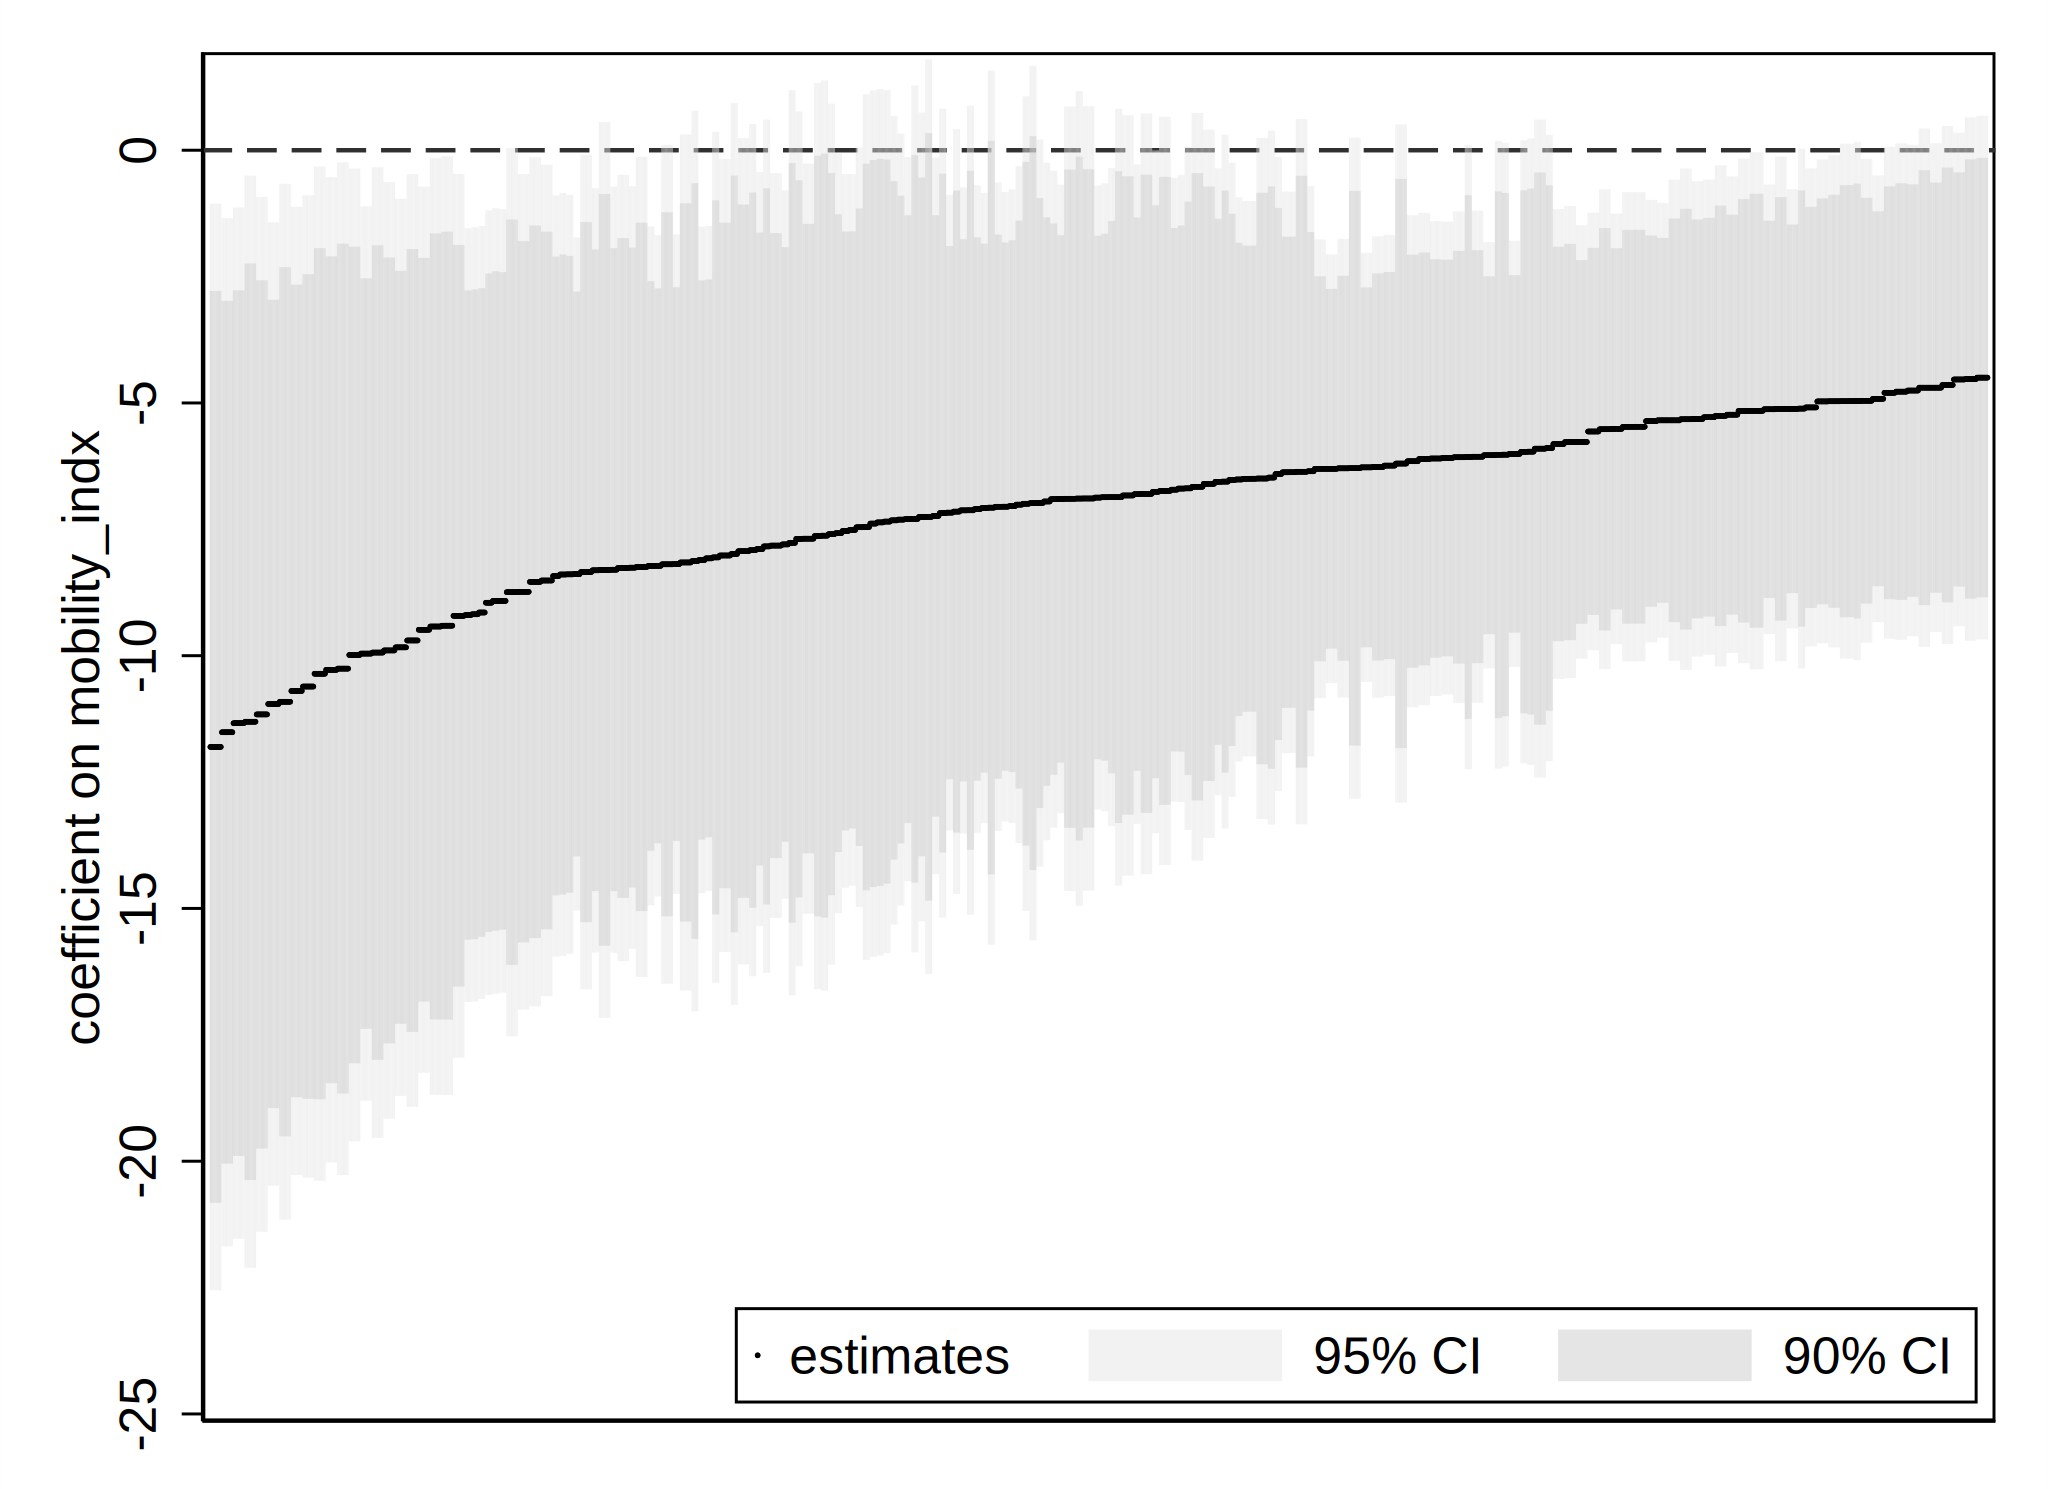

In [29]:
%%stata
speccurve using models, param(mobility_indx)  graphopts(saving(speccurve_outflow,replace))


. speccurve using models, param(mobility_indx)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_outflow_data) 


Exception in thread Stata:
Traceback (most recent call last):
  File "C:\Users\haruokakehi\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C://Program Files//Stata17\utilities\pystata\core\stout.py", line 176, in run
    raise SystemError(output)
SystemError: unable to allocate matrix;
    You have attempted to create a matrix with too many rows or columns or attempted to fit a model with too many variables.

    You are using Stata/BE which supports matrices with up to 800 rows or columns.  See limits for how many more rows and columns
    Stata/SE and Stata/MP can support.

    If you are using factor variables and included an interaction that has lots of missing cells, try set emptycells drop to
    reduce the required matrix size; see help set emptycells.

    If you are using factor variables, you might have accidentally treated a continuous variable as a categorical, resulting in
    lots of categories.  Use the c. operator on such variables.
r(9

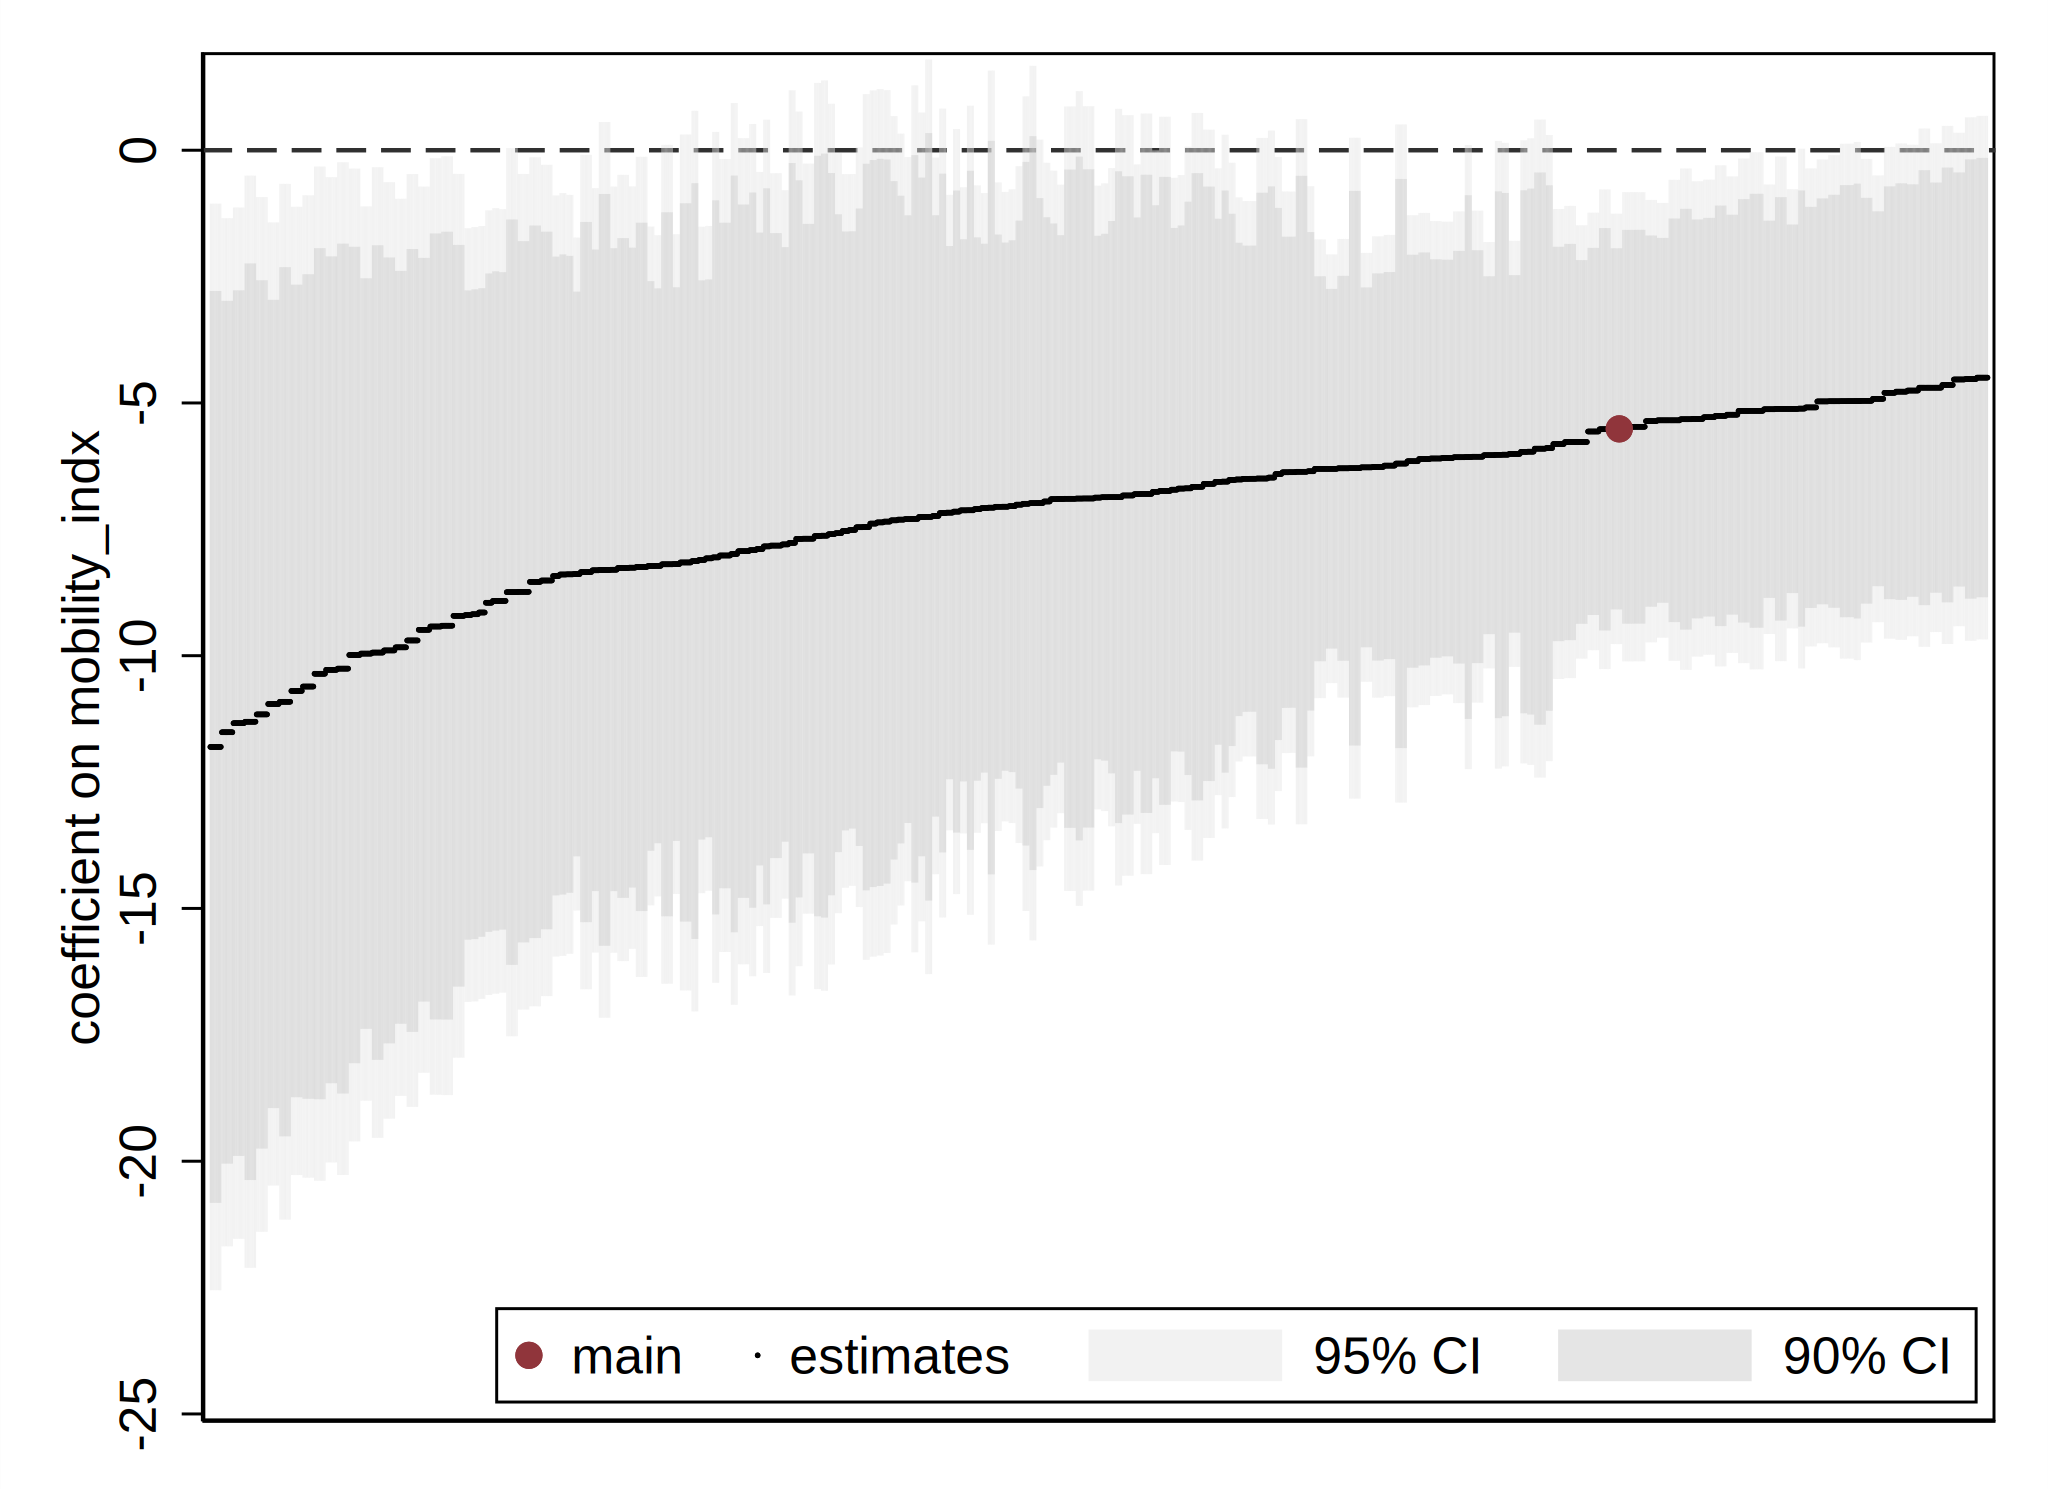

In [27]:
%%stata 
speccurve using models, param(mobility_indx)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_outflow_data) 
graph save speccurve_outflow,replace

## CV

In [30]:
%%stata  
qui{
use ../data/suicide_analysis_data_static, clear
local x="u20"
sum suicide_f_`x'
local suicide_f_m=r(mean)    
est clear
local no=0    
local paracomp_f="(cv_residents: _b[D.cv_residents]*(1+`suicide_f_m')/(`suicide_f_m')) "
foreach poi of numlist 0/1{   
if `poi'==0{   
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "D.log_active_opening_ratio" {
     foreach patient in "" "D.log_patient" {
      foreach sch_clo_rat in "" "D.school_closure_ratio" {
        foreach unemp_rat in "" "D.log_unemployment_rate" {     
          foreach bank_debt in "" "D.log_bankruptcy_debt" {                
          local ivs="commuter_ratio_m"   
         if `iv_var'==1 qui local ivs="commuter_ratio" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m commuter_ratio_f "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
        qui: xtset citycode covid                                      
        qui:ivreg2 D.suicide_f_`x'_log (D.cv_residents= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars')   
        qui:nlcom `paracomp_f', post    
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace 
        qui estadd scalar  poi_v = 0, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'   
        if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0)&(`iv_var'==0)&(`act_ope_rat_v'==0)&(`patient_v'==0)&(`unemp_rat_v'==0)&(`sch_clo_rat_v'==0) &(`bank_debt_v'==0)  {
        noi: di "`dataset'"    
        noi: di "ivreg2 D.suicide_f_`x'_log (D.cv_residents= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars') "                                                                                                                                                             
        noi: di  "base: `no'"                                                                                                                                                
        }                                          
        local ++no   
        if `no'==1{                                  
         qui:estimate save models_cv,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models_cv,append
         qui:est clear            
        }   
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }
}
}
else{
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "log_active_opening_ratio" {
     foreach patient in "" "log_patient" {
      foreach sch_clo_rat in "" "school_closure_ratio" {
        foreach unemp_rat in "" "log_unemployment_rate" {     
          foreach bank_debt in "" "log_bankruptcy_debt" {   
         
          local ivs="commuter_ratio_m_iv"   
         if `iv_var'==1 qui local ivs="commuter_ratio_iv" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m_iv commuter_ratio_f_iv "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
                                         
        qui: xtset citycode covid    
        qui: xtreg cv_residents `ivs'	 `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe                             
        qui:capture drop  cv_residents_hat                                                                                                                
        qui:predict double cv_residents_hat, e                                                                                                                 
        qui:xtpoisson suicide_f_`x' cv_residents cv_residents_hat `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe vce(robust)               
        qui:nlcom (cv_residents: _b[cv_residents]), post
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace  
        qui estadd scalar  poi_v = 1, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'                                             
        local ++no   
        if `no'==1{                                  
         qui:estimate save models_cv,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models_cv,append
         qui:est clear            
        }                                 
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }        
}
}
}
}              
di `no'






. qui{
use data0,clear
ivreg2 D.suicide_f_u20_log (D.cv_residents= commuter_ratio_m )     , gmm2s cluster(citycode) 
base: 0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500

. di `no'
1536

. 
. 
. 
. 


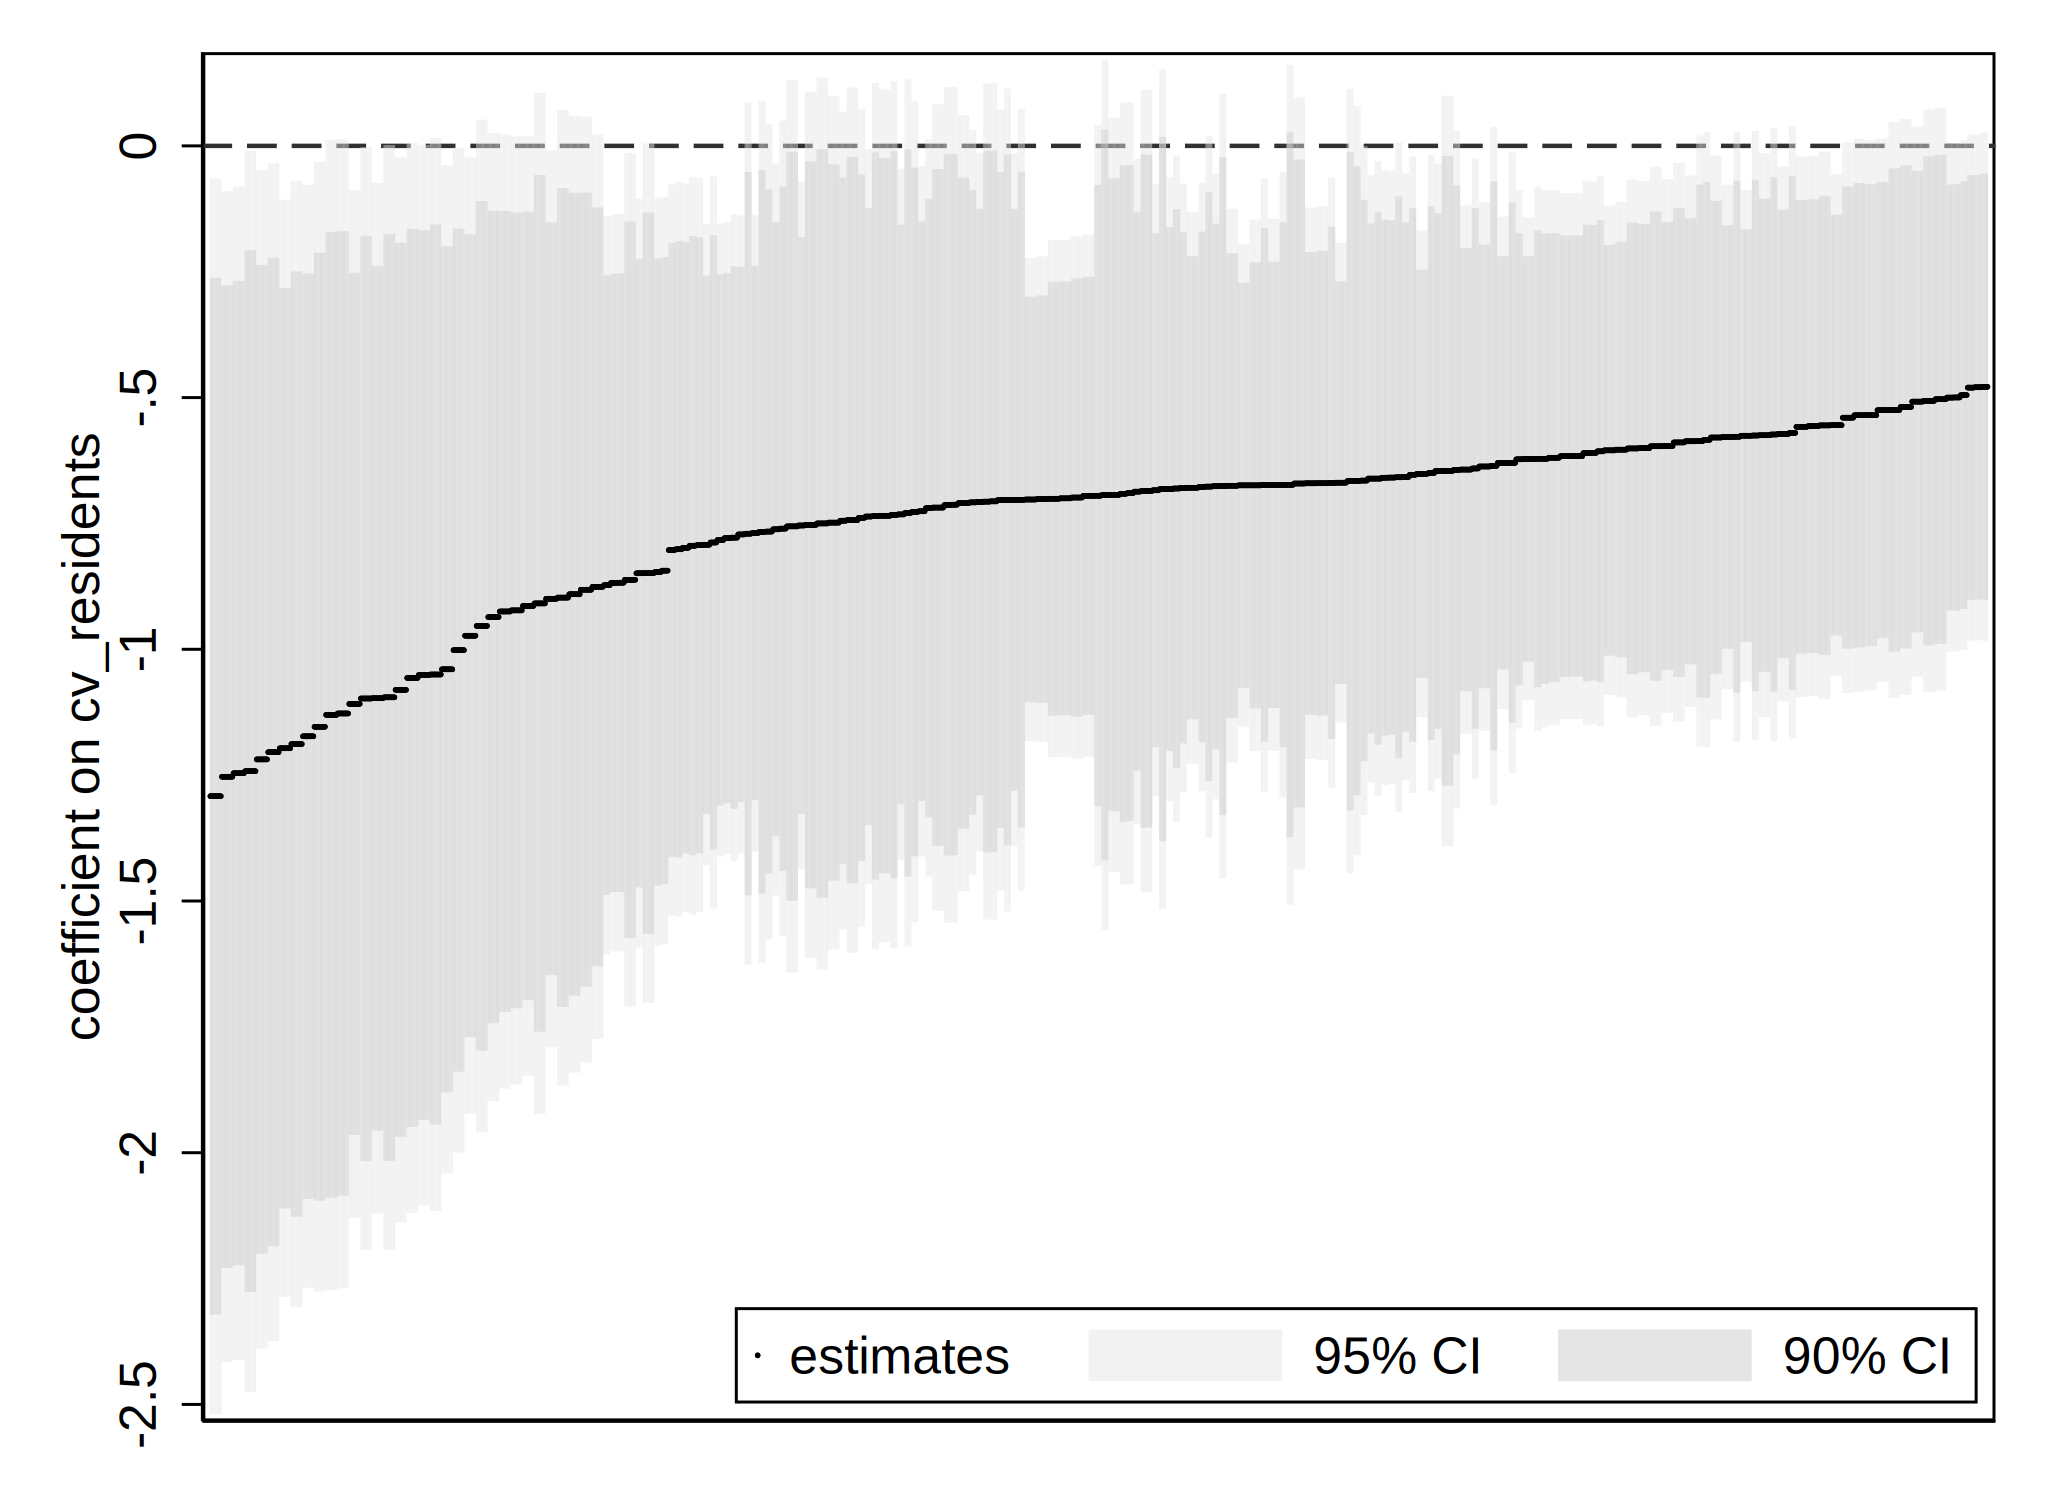

In [31]:
%%stata
speccurve using models_cv, param(cv_residents)  graphopts(saving(speccurve_cv,replace))


. speccurve using models_cv, param(cv_residents)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_cv_data) 

. graph save speccurve_cv,replace
file speccurve_cv.gph saved

. 


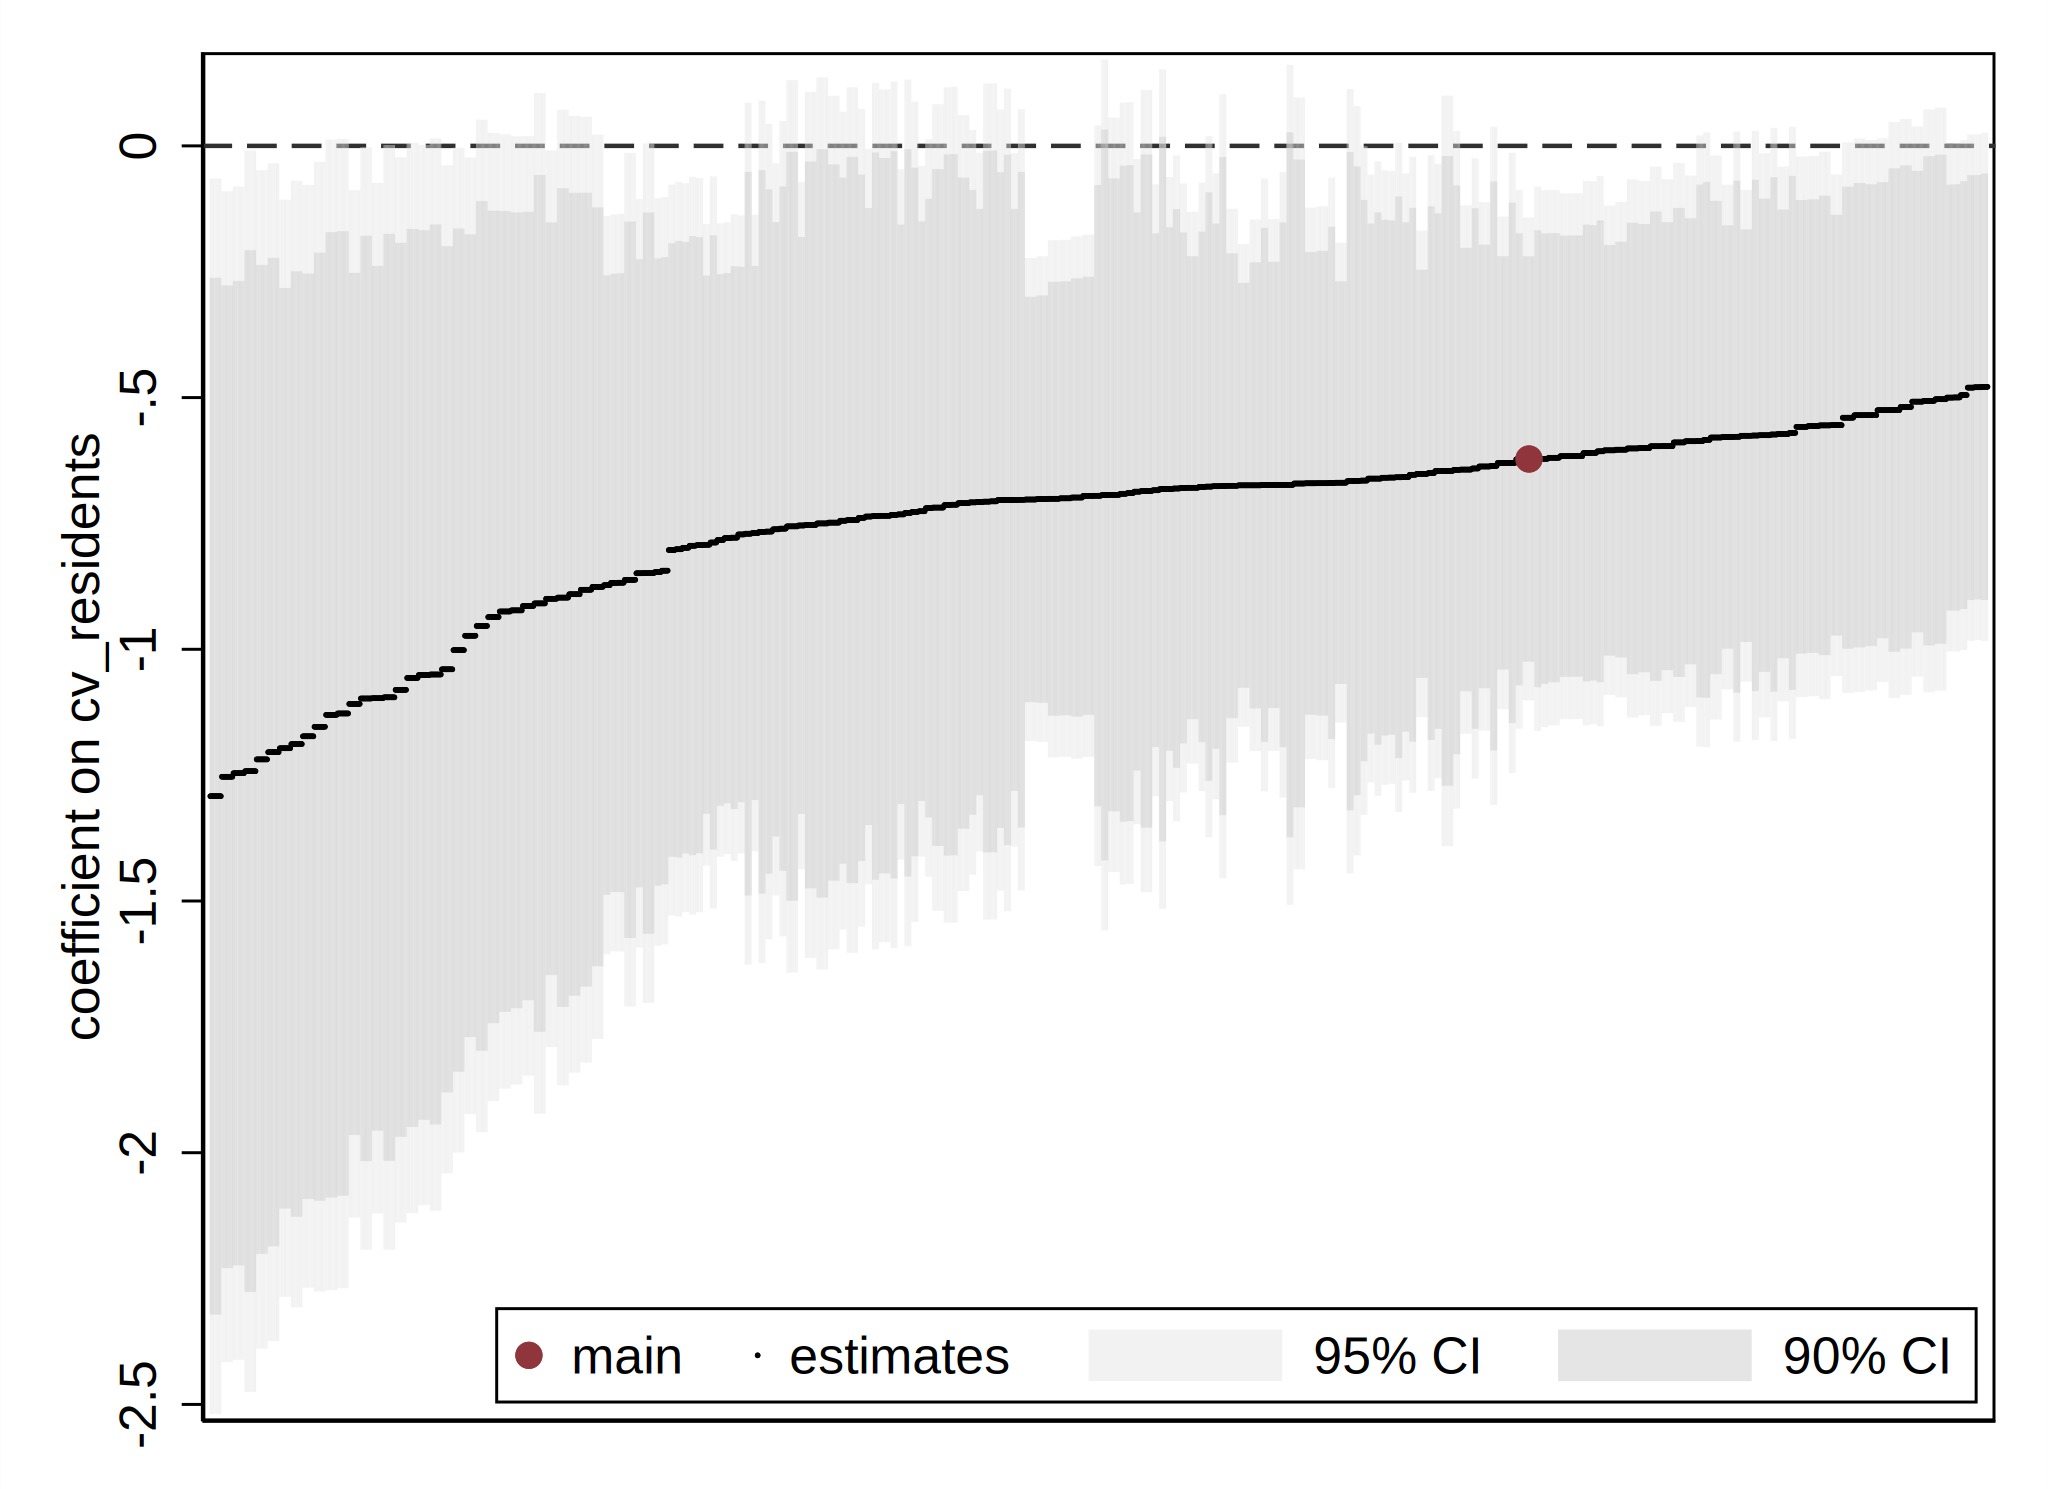

In [32]:
%%stata 
speccurve using models_cv, param(cv_residents)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_cv_data) 
graph save speccurve_cv,replace

## CV within (place+station)

In [40]:
%%stata  
qui{
use ../data/suicide_analysis_data_static, clear
local x="u20"
sum suicide_f_`x'
local suicide_f_m=r(mean)    
est clear
local no=0    
local paracomp_f="(cv_residents_spot: _b[D.cv_residents_spot]*(1+`suicide_f_m')/(`suicide_f_m')) "
foreach poi of numlist 0/1{   
if `poi'==0{   
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "D.log_active_opening_ratio" {
     foreach patient in "" "D.log_patient" {
      foreach sch_clo_rat in "" "D.school_closure_ratio" {
        foreach unemp_rat in "" "D.log_unemployment_rate" {     
          foreach bank_debt in "" "D.log_bankruptcy_debt" {                
          local ivs="commuter_ratio_m"   
         if `iv_var'==1 qui local ivs="commuter_ratio" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m commuter_ratio_f "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
        qui: xtset citycode covid                                      
        qui:ivreg2 D.suicide_f_`x'_log (D.cv_residents_spot= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars')   
        qui:nlcom `paracomp_f', post    
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace 
        qui estadd scalar  poi_v = 0, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'   
        if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0)&(`iv_var'==0)&(`act_ope_rat_v'==0)&(`patient_v'==0)&(`unemp_rat_v'==0)&(`sch_clo_rat_v'==0) &(`bank_debt_v'==0)  {
        noi: di "`dataset'"    
        noi: di "ivreg2 D.suicide_f_`x'_log (D.cv_residents_spot= `ivs' ) `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt', gmm2s cluster(`clsvars') "                                                                                                                                                             
        noi: di  "base: `no'"                                                                                                                                               
        }                                          
        local ++no   
        if `no'==1{                                  
         qui:estimate save models_cv_place,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models_cv_place,append
         qui:est clear            
        }   
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }
}
}
else{
foreach city of numlist 0/1{              
foreach iv_var of numlist 0/2{ 
  foreach ex_2020_3 of  numlist 0/1{   
   foreach ex_2022 of  numlist 0/1{           
    foreach act_ope_rat in "" "log_active_opening_ratio" {
     foreach patient in "" "log_patient" {
      foreach sch_clo_rat in "" "school_closure_ratio" {
        foreach unemp_rat in "" "log_unemployment_rate" {     
          foreach bank_debt in "" "log_bankruptcy_debt" {   
         
          local ivs="commuter_ratio_m_iv"   
         if `iv_var'==1 qui local ivs="commuter_ratio_iv" 
         if `iv_var'==2 qui local ivs="commuter_ratio_m_iv commuter_ratio_f_iv "      
              
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data0,clear"                 
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data1,clear"     
         if (`city'==0)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data2,clear"     
         if (`city'==0)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data3,clear"   
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==0) qui local dataset="use data4,clear"                                             
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==0) qui local dataset="use data5,clear"     
         if (`city'==1)&(`ex_2020_3'==0)&(`ex_2022'==1) qui local dataset="use data6,clear"     
         if (`city'==1)&(`ex_2020_3'==1)&(`ex_2022'==1) qui local dataset="use data7,clear"                                            
        qui: `dataset'  
                                         
        qui: xtset citycode covid    
        qui: xtreg cv_residents_spot `ivs'	 `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe                             
        qui:capture drop  cv_residents_spot_hat                                                                                                                
        qui:predict double cv_residents_spot_hat, e                                                                                                                 
        qui:xtpoisson suicide_f_`x' cv_residents_spot cv_residents_spot_hat `act_ope_rat' `patient' `unemp_rat' ` sch_clo_rat' `bank_debt' i.covid, fe vce(robust)               
        qui:nlcom (cv_residents_spot: _b[cv_residents_spot]), post
        qui: estadd local estimates_title "md`no'"    
        qui estadd scalar  city_v = 0, replace               
        qui estadd scalar  iv_var_v = 0, replace            
        qui estadd scalar  ex_2020_3_v = 0, replace            
        qui estadd scalar  ex_2022_v = 0, replace             
        qui estadd scalar  act_ope_rat_v = 0, replace
        qui estadd scalar  patient_v = 0, replace
        qui estadd scalar  sch_clo_rat_v = 0, replace 
        qui estadd scalar  unemp_rat_v = 0, replace   
        qui estadd scalar  bank_debt_v = 0, replace  
        qui estadd scalar  poi_v = 1, replace                                            
        if `iv_var'==1 qui estadd scalar  iv_var_v = 1, replace    
        if `iv_var'==2 qui estadd scalar  iv_var_v = 2, replace                                              
        if `ex_2020_3'!=0 qui estadd scalar  ex_2020_3_v = 1, replace       
        if `ex_2022'!=0 qui estadd scalar  ex_2022_v = 1, replace  
        if `city'!=0 qui estadd scalar  city_v = 1, replace   
        foreach vr in act_ope_rat  patient sch_clo_rat unemp_rat bank_debt {
          qui local `vr'_v = 0             
          if "``vr''"!="" qui estadd scalar `vr'_v = 1, replace
          if "``vr''"!="" qui local `vr'_v = 1     
        }                                          
        qui: eststo md`no'                                             
        local ++no   
        if `no'==1{                                  
         qui:estimate save models_cv_spot,replace
         qui:est clear                                          
        }
        else{
         qui:estimate save models_cv_spot,append
         qui:est clear            
        }                                 
        if mod(`no',50)==0 noi: di `no' 
        }               
       }
      }
     }
    }   
   }    
  }  
 }        
}
}
}
}              
di `no'






. qui{
use data0,clear
ivreg2 D.suicide_f_u20_log (D.cv_residents_spot= commuter_ratio_m )     , gmm2s cluster(citycode) 
base: 0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500

. di `no'
1536

. 
. 
. 
. 


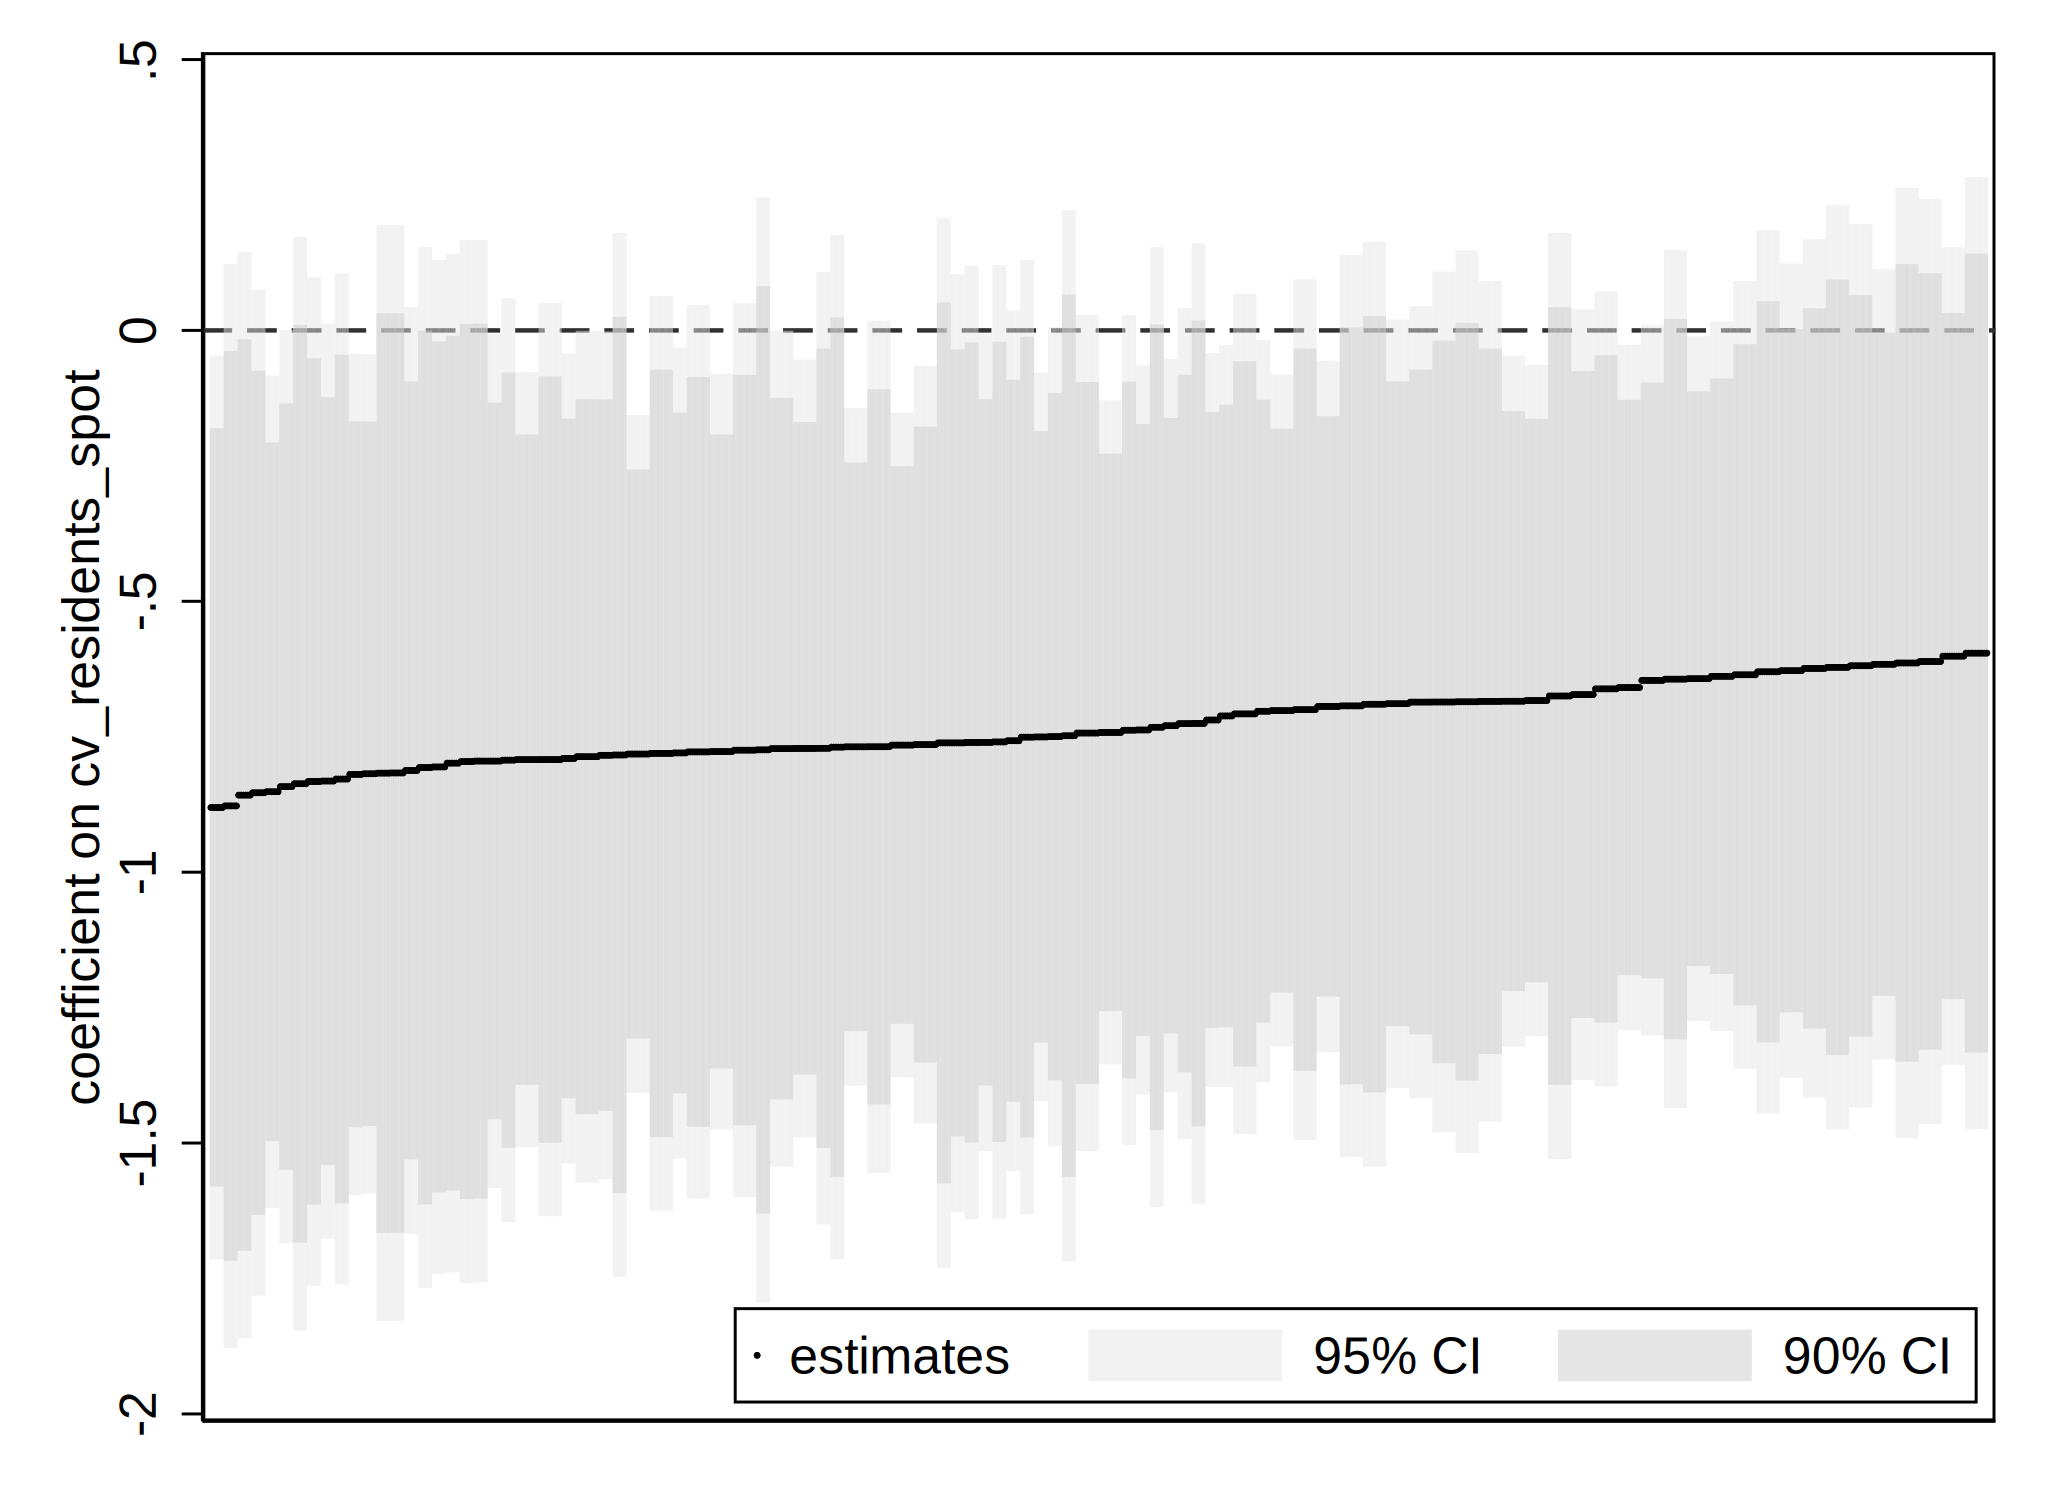

In [41]:
%%stata
speccurve using models_cv_place, param(cv_residents_spot)  graphopts(saving(speccurve_cv_place,replace))


. speccurve using models_cv_place, param(cv_residents_spot)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_cv_place
> _data) 

. graph save speccurve_cv_place,replace
file speccurve_cv_place.gph saved

. 


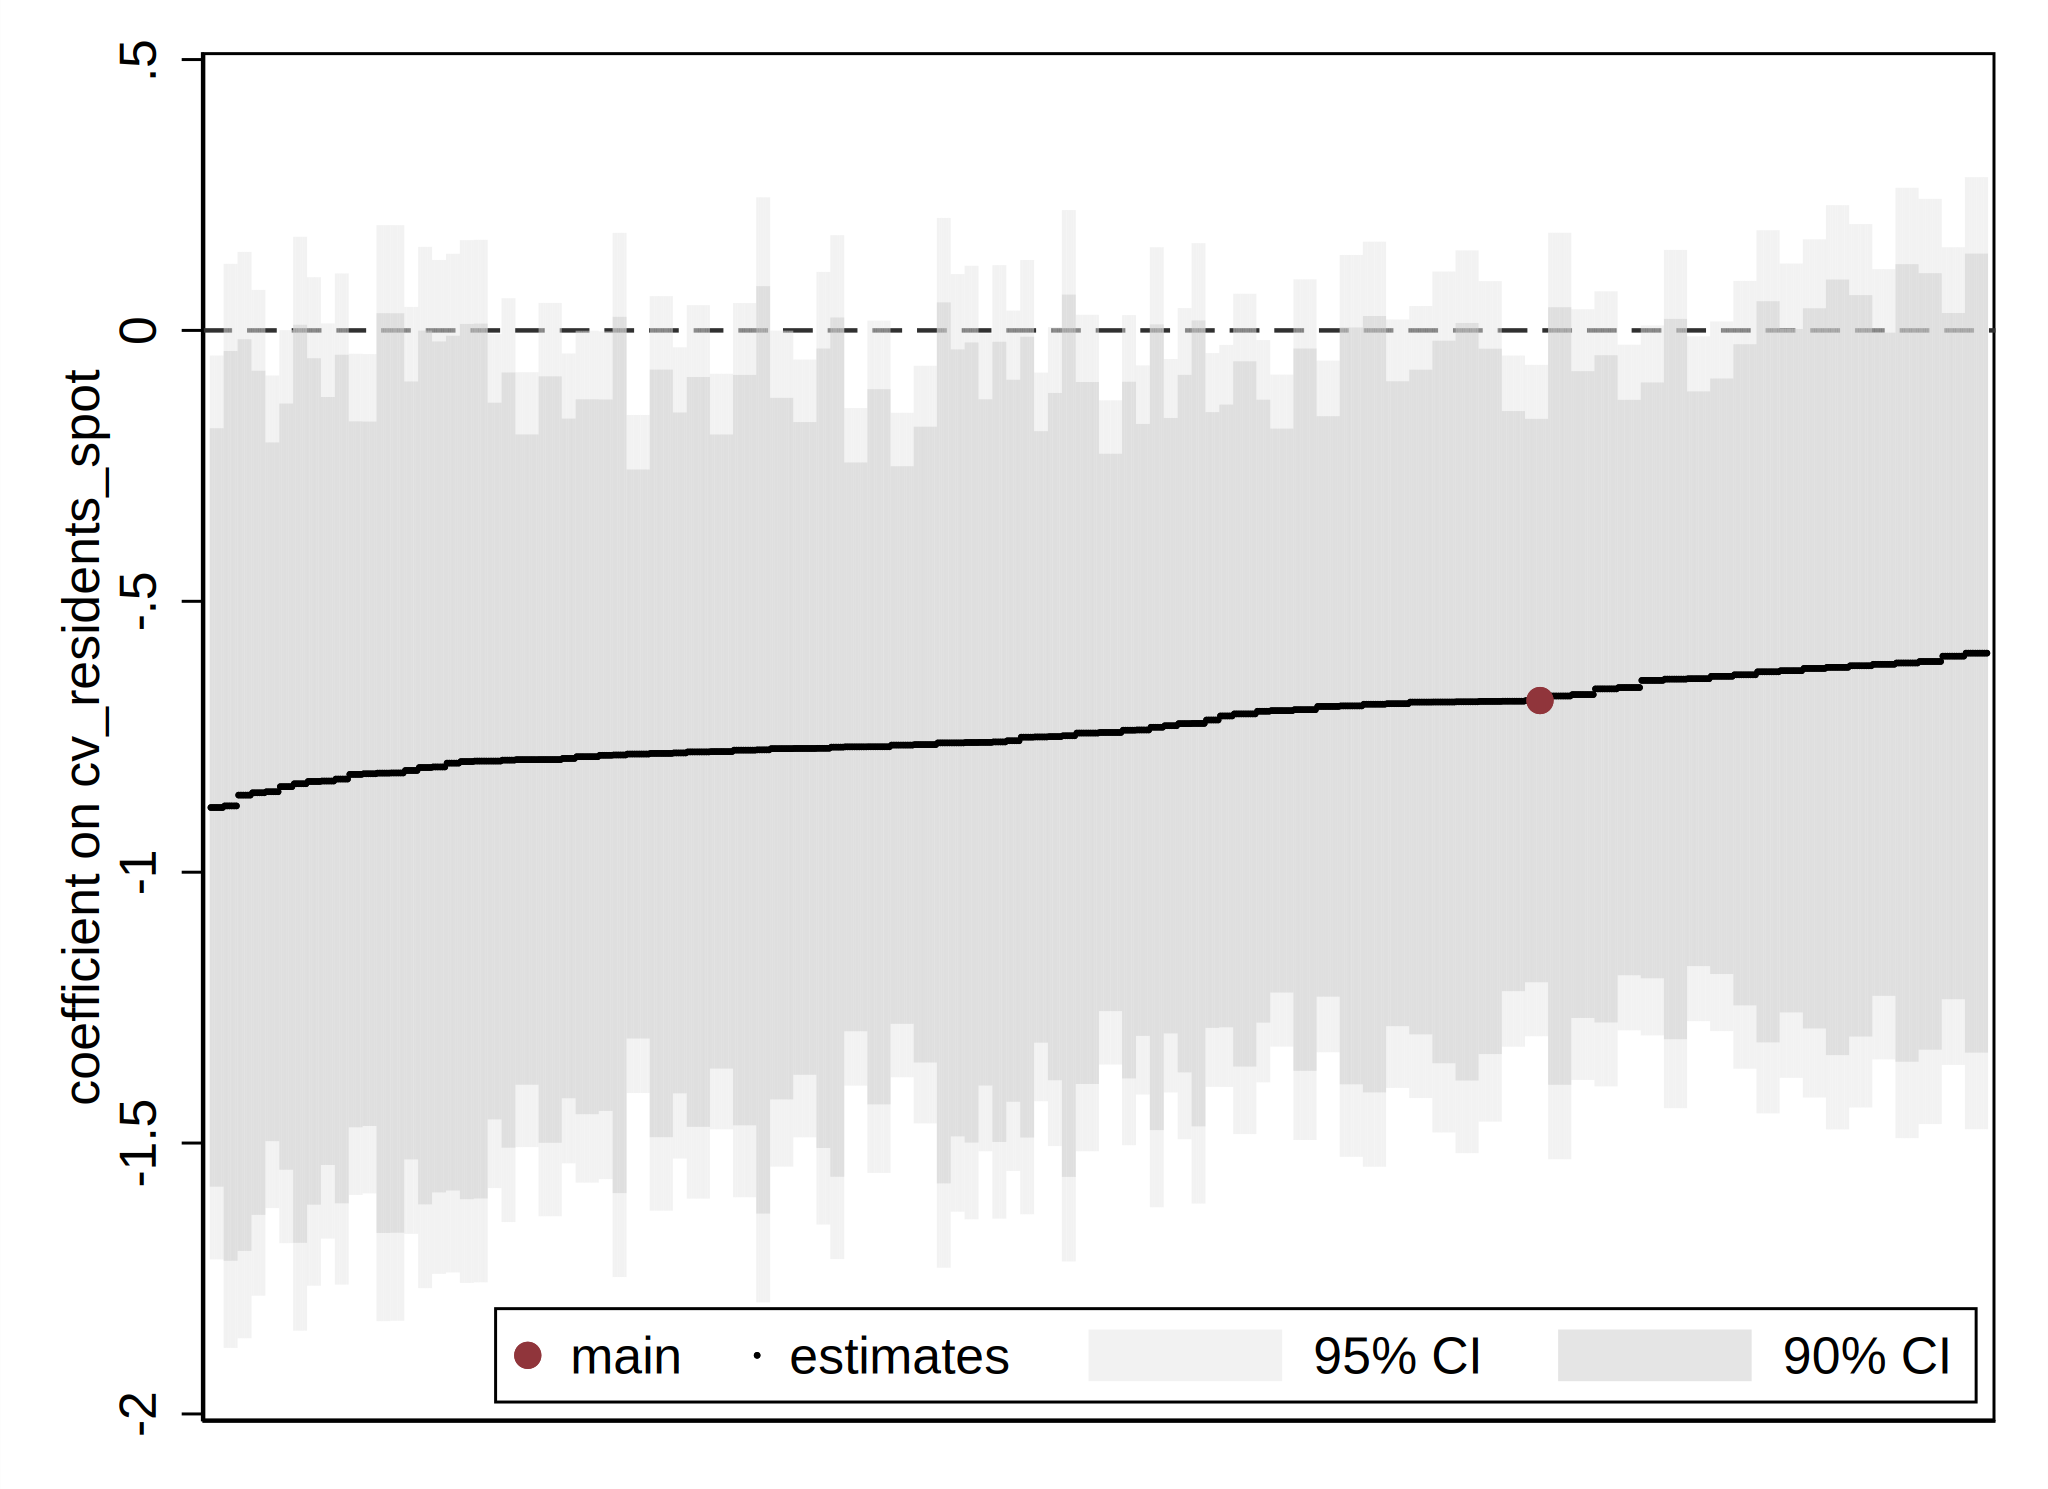

In [42]:
%%stata 
speccurve using models_cv_place, param(cv_residents_spot)  main(md0, graphopts(msize(medium) msymbol(O)) ) save(speccurve_cv_place_data) 
graph save speccurve_cv_place,replace